# Hactiv8 Python for Data Science

Topik of discussion
- Regression Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline


## Simple Linear Regression with Scikit-learn

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

print(x, y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]] [ 5 20 14 32 22 38]


In [3]:
model = LinearRegression()

In [4]:
model.fit(x, y)

LinearRegression()

In [5]:
model = LinearRegression().fit(x, y)

In [6]:
r_sq = model.score(x, y)
print('cofficient of determination:', r_sq)

cofficient of determination: 0.715875613747954


In [7]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.633333333333329
slope: [0.54]


In [8]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

intercept: [5.63333333]
slope: [[0.54]]


In [9]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


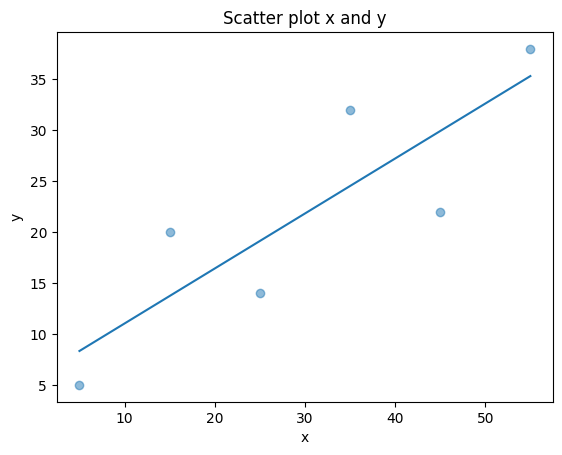

In [10]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)

plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [12]:
x_new = np.arange(5).reshape((-1, 1))
y_new = model.predict(x_new)

print(x_new, y_new)

[[0]
 [1]
 [2]
 [3]
 [4]] [5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


## Multiple Linear Regression with scikit-learn

In [13]:
x = [[0,1], [5,1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [14]:
print(x, y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] [ 4  5 20 14 32 22 38 43]


In [15]:
model = LinearRegression().fit(x, y)

In [16]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [17]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [18]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:' , y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [19]:
x_new = np.arange(10).reshape((-1, 2))
y_new = model.predict(x_new)

print(x_new, y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]] [ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Polynomial Regression with scikit learn

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

In [22]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [23]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [24]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [25]:
x_ = transformer.transform(x)

In [26]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [27]:
model = LinearRegression().fit(x_, y)

In [28]:
r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8908516262498565
intercept: 21.372321428571425
slope: [-1.32357143  0.02839286]


In [29]:
y_pred = model.predict(x_)
y_pred

array([15.46428571,  7.90714286,  6.02857143,  9.82857143, 19.30714286,
       34.46428571])

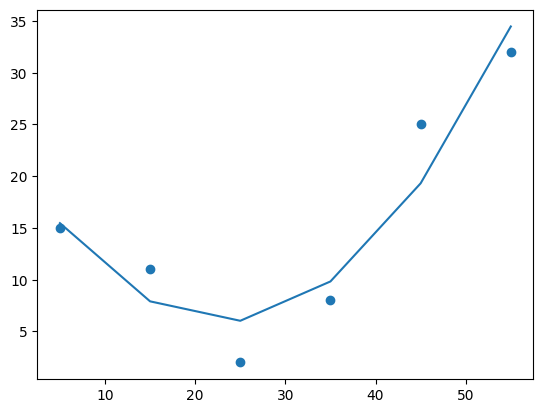

In [30]:
plt.scatter(x, y)
plt.plot(x, y_pred)

## Advanced Linear Regression with statsmodels

In [31]:
import statsmodels.api as sm

In [32]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [33]:
print(x, y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] [ 4  5 20 14 32 22 38 43]


In [34]:
x = sm.add_constant(x)

In [35]:
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [36]:
model = sm.OLS(y, x)

In [37]:
results = model.fit()

In [38]:
print(results.summary())

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Fri, 29 Sep 2023   Prob (F-statistic):            0.00713
Time:                        13:35:03   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

In [39]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.8615939258756776
adjusted coefficient of determination: 0.8062314962259487
regression coefficients: [5.52257928 0.44706965 0.25502548]


In [40]:
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(x), sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [41]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
y_new = results.predict(x_new)

print(x_new)
print(y_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Implementing Linear Regression on Real Dataset

In [45]:
from sklearn import datasets

data = datasets.load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
print(data.DESCR)

In [ ]:
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])

In [ ]:
df.head()

In [ ]:
target.head()

In [ ]:
X = df['RM']
y = target['MEDV']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

In [ ]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Using SKlearn

In [42]:
from sklearn import linear_model

from sklearn import datasets
data = datasets.load_diabetes()

In [44]:
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)

In [45]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [46]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [47]:
target = pd.DataFrame(data.target, columns=['disease_prog'])

In [48]:
target

,disease_prog
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [49]:
df_new = sm.add_constant(df[['bmi']])
df_new

,const,bmi
0,1.0,0.061696
1,1.0,-0.051474
2,1.0,0.044451
3,1.0,-0.011595
4,1.0,-0.036385
...,...,...
437,1.0,0.019662
438,1.0,-0.015906
439,1.0,-0.015906
440,1.0,0.039062


In [50]:
model = sm.OLS(target, df_new)
result = model.fit()

In [52]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           disease_prog   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           3.47e-42
Time:                        13:45:05   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.0

In [53]:
df_new = sm.add_constant(df)

In [54]:
model = sm.OLS(target, df_new)
result = model.fit()

In [55]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           disease_prog   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           3.83e-62
Time:                        13:47:48   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

## Using SKlearn Example 2

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('datasets/CarPrice_Assignment.csv', usecols=['horsepower', 'price'])
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [57]:
df.shape

(205, 2)

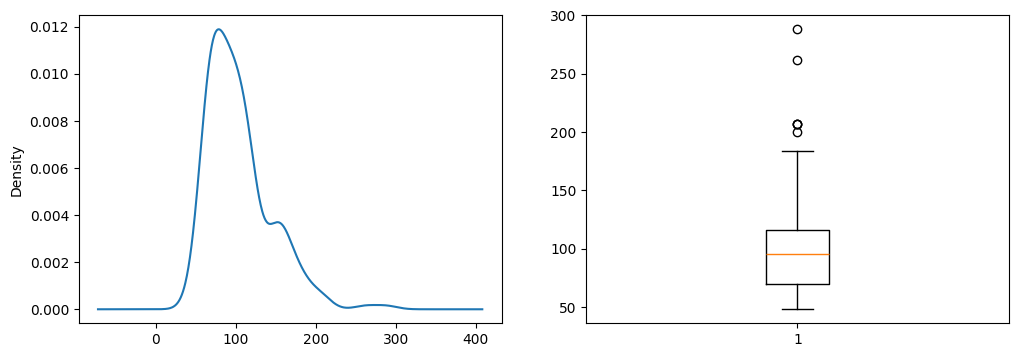

In [58]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

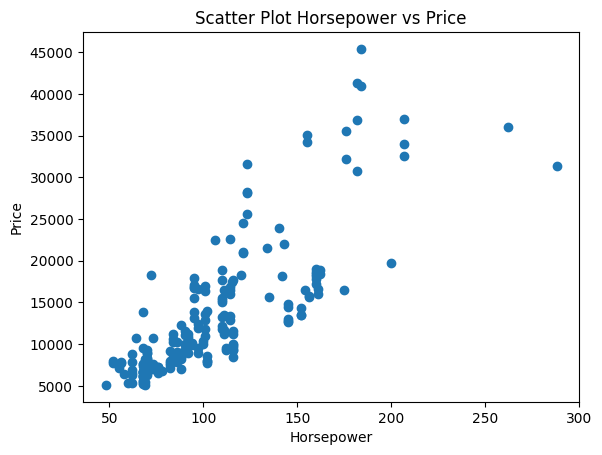

In [59]:
plt.scatter(df['horsepower'], df['price'])

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [60]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [61]:
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [63]:
x_train.shape

(164, 1)

In [64]:
x_test.shape

(41, 1)

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [66]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[181.66874367]]
[-5474.89960593]


In [67]:
lin_reg.score(x_test, y_test)

0.6460910624484841

Text(0.5, 1.0, 'Plot Horsepower vs Price')

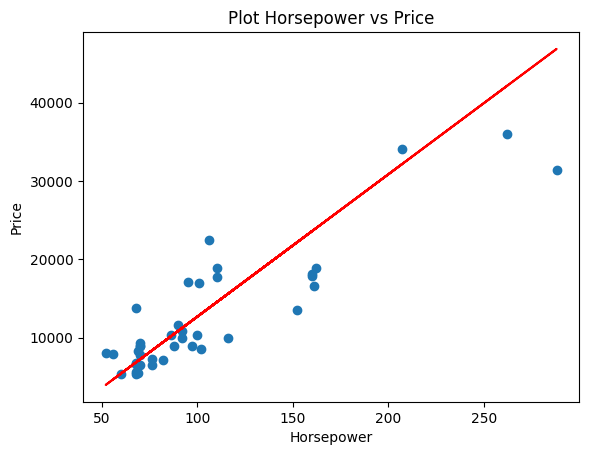

In [68]:
y_prediction = lin_reg.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [69]:
lin_reg.predict([[100]])

array([[12691.97476062]])

In [70]:
lin_reg.predict([[150]])

array([[21775.41194389]])

In [71]:
lin_reg.predict([[200]])

array([[30858.84912716]])